![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- For this project, we have reduced the number of images. There are around 16,500+ images in the dataset provided. You can check “label_details” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 33 classes in the dataset, model should be trained on a minimum of 15 classes.

In [44]:
import tensorflow as tf
print (tf.__version__)

2.3.0


In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unrar x "/content/drive/My Drive/Data - German Traffic Sign Recognition.rar"

### Initialize ImageDataGenerator (5 Marks)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in testing

In [47]:
img_size = 30

In [48]:
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.0,
                                                               validation_split=0.25)

### Get training data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [49]:
#Build training generator. 
train_generator = img_generator.flow_from_directory('/content/drive/My Drive/Data - German Traffic Sign Recognition/Data - German Traffic Sign Recognition/Train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=32,
                                                    #classes=['10','11','12','13','14','15',
                                                    # '16','17','18','19','20','21','22','23','24','25'],
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    subset='training',
                                                    seed=42)

Found 22124 images belonging to 33 classes.


### Get validation data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [50]:
#Build test generator
test_generator = img_generator.flow_from_directory('/content/drive/My Drive/Data - German Traffic Sign Recognition/Data - German Traffic Sign Recognition/Train',
                                                   target_size=(img_size, img_size),
                                                   batch_size=32,
                                                   #classes=['10','11','12','13','14','15',
                                                   # '16','17','18','19','20','21','22','23','24','25'],
                                                   class_mode='categorical',
                                                   color_mode='rgb',                                             
                                                   subset='validation',
                                                   seed=42)

Found 7364 images belonging to 33 classes.


In [51]:
#Lets check the features (images) and Labels (signal class) returned by ImageDataGenerator
X, y = next(train_generator)

print('Input features shape', X.shape)
print('Actual labels shape', y.shape)

Input features shape (32, 30, 30, 3)
Actual labels shape (32, 33)


### Define model (5 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [59]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(rate=0.25))
#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))

#Add Output Layer
model.add(tf.keras.layers.Dense(33, activation='softmax'))

### Compile the model (2 Marks)
- Specify optimizer, loss & metrics

In [60]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Get model summary (2 Marks)

In [61]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 30, 30, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

### Fit the model (3 Marks)
- Specify epochs
- Specify batch_size
- Give validation_data
- Validation accuracy should be more than 90%

In [62]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('flowers_cnn.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max',
                                                    min_delta=0.001,
                                                    patience=5,
                                                    verbose=1)

In [63]:
history = model.fit(train_generator,
                    epochs=5,
                    steps_per_epoch= 22124//32,  #Number of training images//batch_size
                    validation_data=test_generator,
                    validation_steps = 7364//32, #Number of test images//batch_size
                    callbacks = [model_checkpoint])

Epoch 1/5
691/691 [==============================] - 38s 56ms/step - loss: 0.9099 - accuracy: 0.7433 - val_loss: 0.2657 - val_accuracy: 0.9408
Epoch 2/5
691/691 [==============================] - 38s 55ms/step - loss: 0.1612 - accuracy: 0.9504 - val_loss: 0.1659 - val_accuracy: 0.9592
Epoch 3/5
691/691 [==============================] - 39s 57ms/step - loss: 0.1064 - accuracy: 0.9683 - val_loss: 0.1510 - val_accuracy: 0.9635
Epoch 4/5
691/691 [==============================] - 38s 55ms/step - loss: 0.0899 - accuracy: 0.9741 - val_loss: 0.1460 - val_accuracy: 0.9641
Epoch 5/5
691/691 [==============================] - 38s 55ms/step - loss: 0.0726 - accuracy: 0.9794 - val_loss: 0.1489 - val_accuracy: 0.9633


### Draw plots (3 Marks)
- Plot training accuracy and validation accuracy with respect to epochs
- Plot training loss and validation loss with respect to epochs

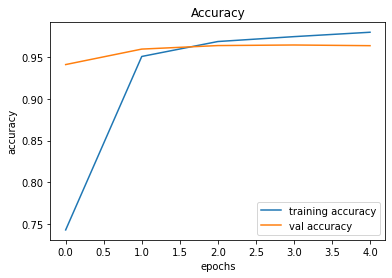

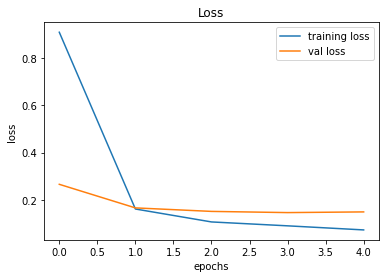

In [64]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()